# Importing useful libraries

In [58]:
# Importing useful libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2, f_classif, RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.preprocessing import RobustScaler
import warnings

# Data preparation


In [ ]:
warnings.filterwarnings('ignore')

In [7]:
# importing data
data_path="./prediktiv_data.csv"
target_column = pd.read_csv(data_path, index_col='id')

In [8]:
target_column.head()

,target,feature01,feature02,feature03,feature04,feature05,feature06,feature07,feature08,feature09,...,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23
id,,,,,,,,,,,,,,,,,,,,,
1,215000,2.0,528.0,0,1080.0,1656,7,1656,6,5,...,2,good,bad,3,1,5,2010,0,0,1960
2,105000,1.0,730.0,0,882.0,896,5,896,5,6,...,0,NaN,bad,2,1,6,2010,0,0,1961
3,172000,1.0,312.0,0,1329.0,1329,6,1329,6,6,...,0,NaN,good,3,1,6,2010,1,0,1958
4,244000,2.0,522.0,0,2110.0,2110,8,2110,7,5,...,2,bad,amazing,3,1,4,2010,1,0,1968
5,189900,2.0,482.0,0,928.0,928,6,1629,5,5,...,1,bad,bad,3,1,3,2010,1,701,1998


In [9]:
# Number of rows(observations) & columns(features) in the data
target_column.shape

(2930, 25)

In [10]:
# number of NaN values
nan_per_col = target_column.isna().sum()
#print(nan_per_col)

In [11]:
# Showing all variables with missing values
nan_per_col[nan_per_col>0]

feature01       1
feature02       1
feature04       1
feature11    2732
feature12    2358
feature13       1
feature15    1422
dtype: int64

In [12]:
# Deleting features with large missing values
target_column.drop(nan_per_col[nan_per_col>1].index, axis=1, inplace=True)

In [13]:
target_column.head()

,target,feature01,feature02,feature03,feature04,feature05,feature06,feature07,feature08,feature09,...,feature13,feature14,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23
id,,,,,,,,,,,,,,,,,,,,,
1,215000,2.0,528.0,0,1080.0,1656,7,1656,6,5,...,red,2,bad,3,1,5,2010,0,0,1960
2,105000,1.0,730.0,0,882.0,896,5,896,5,6,...,red,0,bad,2,1,6,2010,0,0,1961
3,172000,1.0,312.0,0,1329.0,1329,6,1329,6,6,...,red,0,good,3,1,6,2010,1,0,1958
4,244000,2.0,522.0,0,2110.0,2110,8,2110,7,5,...,red,2,amazing,3,1,4,2010,1,0,1968
5,189900,2.0,482.0,0,928.0,928,6,1629,5,5,...,red,1,bad,3,1,3,2010,1,701,1998


In [14]:
target_column.shape

(2930, 22)

In [15]:
nan_per_col = target_column.isna().sum()
nan_per_col[nan_per_col>0]


feature01    1
feature02    1
feature04    1
feature13    1
dtype: int64

In [16]:
print(target_column['feature01'].dtype)
print(target_column['feature02'].dtype)
print(target_column['feature04'].dtype)
print(target_column['feature13'].dtype)

float64
float64
float64
object


c:\Users\abels\miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


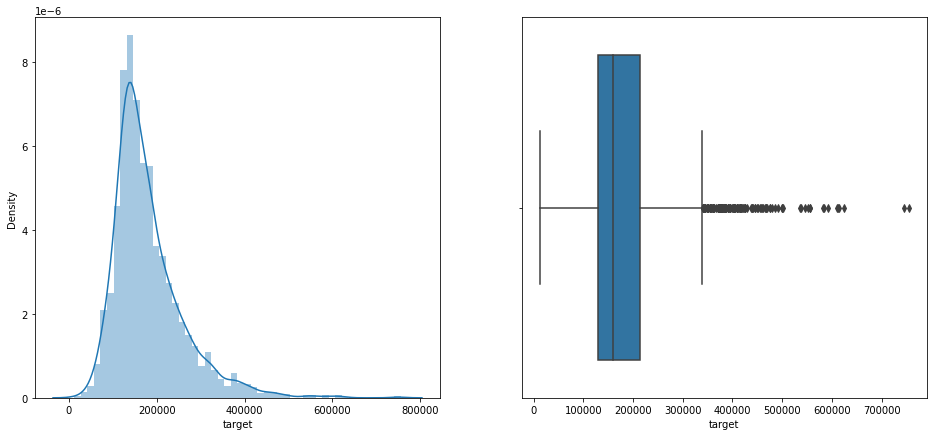

In [24]:
#Using distribution plot and box plots to check for outliers
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 7))
sns.distplot(ax=axes[0], a=target_column['target']);
sns.boxplot(ax=axes[1], x=target_column['target']);

The distribution plot above show skewness to the right meaning there are outliers and the box plot also reveals existence of ouliers to the right hence one considers replacement of small missing values with median for numerical features as mean is highly affected by outliers and mode value or most frequent value for catagorical features as follows.

In [25]:
# Replacing features with small missing values using median and mode values of the respective feature column
target_column['feature01'] = target_column['feature01'].fillna(target_column['feature01'].median())
target_column['feature02'] = target_column['feature02'].fillna(target_column['feature02'].median())
target_column['feature04'] = target_column['feature04'].fillna(target_column['feature04'].median())
target_column['feature13'] = target_column['feature13'].fillna(target_column['feature13'].mode()[0])

In [29]:
# number of NaN values
nan_per_col = target_column.isna().sum()
print(nan_per_col)

target         0
feature01      0
feature02      0
feature03      0
feature04      0
feature05      0
feature06      0
feature07      0
feature08      0
feature09      0
feature10      0
feature10.1    0
feature13      0
feature14      0
feature16      0
feature17      0
feature18      0
feature19      0
feature20      0
feature21      0
feature22      0
feature23      0
dtype: int64


In [30]:
target_column.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2930 entries, 1 to 2930
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   target       2930 non-null   int64  
 1   feature01    2930 non-null   float64
 2   feature02    2930 non-null   float64
 3   feature03    2930 non-null   int64  
 4   feature04    2930 non-null   float64
 5   feature05    2930 non-null   int64  
 6   feature06    2930 non-null   int64  
 7   feature07    2930 non-null   int64  
 8   feature08    2930 non-null   int64  
 9   feature09    2930 non-null   int64  
 10  feature10    2930 non-null   int64  
 11  feature10.1  2930 non-null   int64  
 12  feature13    2930 non-null   object 
 13  feature14    2930 non-null   int64  
 14  feature16    2930 non-null   object 
 15  feature17    2930 non-null   int64  
 16  feature18    2930 non-null   int64  
 17  feature19    2930 non-null   int64  
 18  feature20    2930 non-null   int64  
 19  featur

## Transforming the catagorical features to dummy-variable format.


In [31]:
print(target_column['feature13'].unique())
print(target_column['feature16'].unique())


['red' 'blue' 'green' 'yellow' 'pink']
['bad' 'good' 'amazing' 'okay' 'horrible']


In [32]:
target_column = pd.concat([target_column, pd.get_dummies(target_column['feature13'], prefix='feature13', drop_first=True)],axis=1)
target_column = pd.concat([target_column, pd.get_dummies(target_column['feature16'], prefix='feature16', drop_first=True)],axis=1)
target_column.drop(['feature13','feature16'], axis=1, inplace=True)

In [33]:
target_column.head()

,target,feature01,feature02,feature03,feature04,feature05,feature06,feature07,feature08,feature09,...,feature22,feature23,feature13_green,feature13_pink,feature13_red,feature13_yellow,feature16_bad,feature16_good,feature16_horrible,feature16_okay
id,,,,,,,,,,,,,,,,,,,,,
1,215000,2.0,528.0,0,1080.0,1656,7,1656,6,5,...,0,1960,0,0,1,0,1,0,0,0
2,105000,1.0,730.0,0,882.0,896,5,896,5,6,...,0,1961,0,0,1,0,1,0,0,0
3,172000,1.0,312.0,0,1329.0,1329,6,1329,6,6,...,0,1958,0,0,1,0,0,1,0,0
4,244000,2.0,522.0,0,2110.0,2110,8,2110,7,5,...,0,1968,0,0,1,0,0,0,0,0
5,189900,2.0,482.0,0,928.0,928,6,1629,5,5,...,701,1998,0,0,1,0,1,0,0,0


In [34]:
target_column.shape

(2930, 28)

## Using feature engineering for better prediction of the target

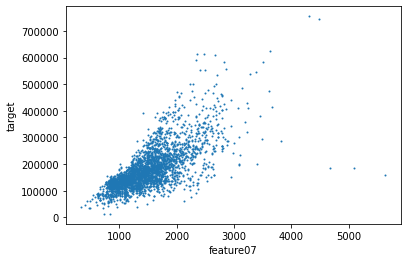

In [35]:
target_column.plot.scatter(x='feature07', y='target', s=1);

In [36]:
target_column['feature07_squared'] = target_column['feature07']**2

In [37]:
target_column.head()

,target,feature01,feature02,feature03,feature04,feature05,feature06,feature07,feature08,feature09,...,feature23,feature13_green,feature13_pink,feature13_red,feature13_yellow,feature16_bad,feature16_good,feature16_horrible,feature16_okay,feature07_squared
id,,,,,,,,,,,,,,,,,,,,,
1,215000,2.0,528.0,0,1080.0,1656,7,1656,6,5,...,1960,0,0,1,0,1,0,0,0,2742336
2,105000,1.0,730.0,0,882.0,896,5,896,5,6,...,1961,0,0,1,0,1,0,0,0,802816
3,172000,1.0,312.0,0,1329.0,1329,6,1329,6,6,...,1958,0,0,1,0,0,1,0,0,1766241
4,244000,2.0,522.0,0,2110.0,2110,8,2110,7,5,...,1968,0,0,1,0,0,0,0,0,4452100
5,189900,2.0,482.0,0,928.0,928,6,1629,5,5,...,1998,0,0,1,0,1,0,0,0,2653641


In [38]:
target_column.shape

(2930, 29)

## Feature Scaling  

In [40]:
dummy_features = ['feature13_green', 'feature13_pink', 'feature13_red', 'feature13_yellow',
                  'feature16_bad', 'feature16_good', 'feature16_horrible', 'feature16_okay' ]
numerical_features =[x for x in target_column.columns if x not in dummy_features+['target']] 

 Applying the scaling operation

In [43]:
target_name = 'target'
X = target_column.drop('target', axis=1)
feature_names = X.columns
robust_scaler = RobustScaler() # Prefered to standardization due to existence of outliers
X = robust_scaler.fit_transform(X)
y = target_column[target_name]

### Using SelectKBest

 For dummy features

In [46]:
# Chi-squared for dummy features. 
dummy_selector = SelectKBest(chi2, k="all") # "k=all" means "apply chi-squared test to all dummy features".
dummy_selector.fit(target_column[dummy_features], target_column[target_name])

SelectKBest(k='all', score_func=<function chi2 at 0x00000179D41DE0D0>)

In [47]:
# The larger the score value for Chi-squared, the stronger the relationship between feature and target.
dummy_selector.scores_

array([ 959.14901208, 1464.        ,   94.89273829, 1262.08764368,
        793.43260723,  956.94557333,  731.5       , 1197.10297635])

In [48]:
# Dummy features with p-value larger than 0.05 are not related with the target
pd.Series(dummy_features).loc[dummy_selector.pvalues_>0.05]

0       feature13_green
2         feature13_red
4         feature16_bad
5        feature16_good
6    feature16_horrible
dtype: object

 For numerical features

In [49]:
# ANOVA F-value between features for classification tasks
numeric_selector = SelectKBest(f_classif, k="all") # "k=all" means "apply F-value test to all numeric features".
numeric_selector.fit(target_column[numerical_features], target_column[target_name])

SelectKBest(k='all')

In [50]:
# Numerical features with p-value larger than 0.05 are not related with the target
pd.Series(numerical_features).loc[numeric_selector.pvalues_>0.05]

2     feature03
13    feature18
14    feature19
dtype: object

### Using Recursive Feature Elimination

Select features by recursively considering smaller and smaller sets of features.

In [53]:
print("Number of featues:", X.shape[1])

Number of featues: 28


In [54]:
RF = RandomForestClassifier(n_estimators=100, max_depth=20, max_features='auto',
                            random_state=55, n_jobs=-1)

In [55]:
recursive_selector = RFE(estimator=RF, n_features_to_select=16)

In [60]:
recursive_selector = recursive_selector.fit(X, y)

In [61]:
recursive_selector.support_

array([ True,  True, False,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True, False,  True,  True, False,  True,
        True, False, False, False, False, False, False, False, False,
        True])

In [63]:
print('16 most important features:')
for x in feature_names[recursive_selector.support_]:
    print(x)

16 most important features:
feature01
feature02
feature04
feature05
feature06
feature07
feature08
feature09
feature10
feature14
feature17
feature19
feature20
feature22
feature23
feature07_squared


In [64]:
print('Features to eliminate:')
for x in feature_names[~recursive_selector.support_]:
    print(x)

Features to eliminate:
feature03
feature10.1
feature18
feature21
feature13_green
feature13_pink
feature13_red
feature13_yellow
feature16_bad
feature16_good
feature16_horrible
feature16_okay


### Apply log transformation onthe target to handel for outliers

In [65]:
target_column['target'] = np.log(target_column['target'])

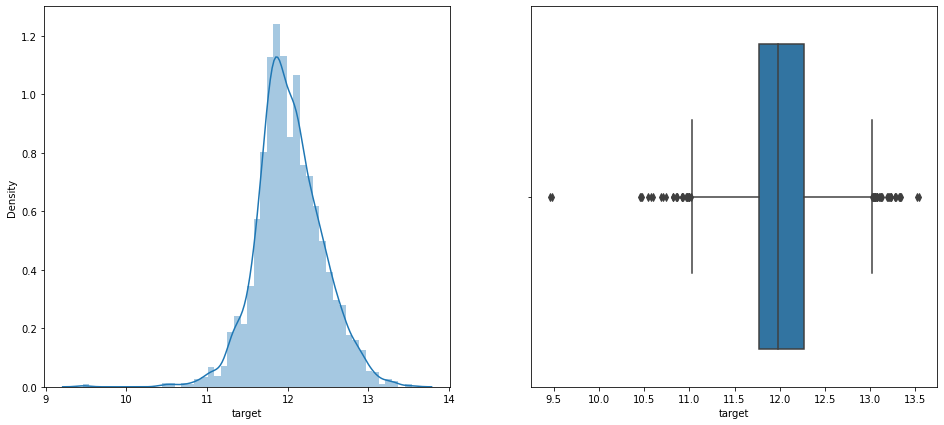

In [66]:
#distribution plot and box plots to check for outliers
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 7))
sns.distplot(ax=axes[0], a=target_column['target']);
sns.boxplot(ax=axes[1], x=target_column['target']);

# Building models 

### Preparing a DataFrame for model analysis

In [275]:
Model_mean = pd.DataFrame(index=['train_mse', 'test_mse'], columns=['NULL', 'MLR', 'KNN', 'LASSO'])
Model_r = pd.DataFrame(index=['train_R2', 'test_R2', 'train_explained_variance', 'test_explained_variance'], columns=['NULL', 'MLR', 'KNN', 'LASSO'])

# Making predictions with selected 16 features 

#### Getting the train and test sets using selected 16 features 

In [276]:
target_name = 'target'
X = target_column[feature_names[recursive_selector.support_]]

#Apply robust scaling to explanatory features to reduce outliers
robust_scaler = RobustScaler()
X = robust_scaler.fit_transform(X)  # x_new=x-median(data)/(Q3-Q1)

y = target_column[target_name]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

## The Null model: predicts the average of the target

In [277]:
y_pred_null = y_train.mean()

Model_mean.loc['train_mse','NULL'] = mean_squared_error(y_pred=np.repeat(y_pred_null, y_train.size), y_true=y_train)
Model_mean.loc['test_mse','NULL'] = mean_squared_error(y_pred=np.repeat(y_pred_null, y_test.size), y_true=y_test)
Model_r.loc['train_R2','NULL'] = r2_score(y_pred=np.repeat(y_pred_null, y_train.size), y_true=y_train)
Model_r.loc['test_R2','NULL'] = r2_score(y_pred=np.repeat(y_pred_null, y_test.size), y_true=y_test)
Model_r.loc['train_explained_variance','NULL'] = explained_variance_score(y_pred=np.repeat(y_pred_null, y_train.size), y_true=y_train)
Model_r.loc['test_explained_variance','NULL'] = explained_variance_score(y_pred=np.repeat(y_pred_null, y_test.size), y_true=y_test)

## Multiple Linear Regression

In [278]:
# 1. Import the estimator object (model)
from sklearn.linear_model import LinearRegression
# 2. Create an instance of the estimator
linear_regression = LinearRegression()
# 3. Use the trainning data to train the estimator
linear_regression.fit(x_train, y_train)
# 4. Evaluate the model
Model_mean.loc['train_mse','MLR'] = mean_squared_error(y_pred=linear_regression.predict(x_train), y_true=y_train)
Model_mean.loc['test_mse','MLR'] = mean_squared_error(y_pred=linear_regression.predict(x_test), y_true=y_test)
Model_r.loc['train_R2','MLR'] = r2_score(y_pred=linear_regression.predict(x_train), y_true=y_train)
Model_r.loc['test_R2','MLR'] = r2_score(y_pred=linear_regression.predict(x_test), y_true=y_test)
Model_r.loc['train_explained_variance','MLR'] = explained_variance_score(y_pred=linear_regression.predict(x_train), y_true=y_train)
Model_r.loc['test_explained_variance','MLR'] = explained_variance_score(y_pred=linear_regression.predict(x_test), y_true=y_test)

## K-Nearest Neighbor Model

In [279]:
# 1. Import the estimator object (model)
from sklearn.neighbors import KNeighborsRegressor
# 2. Create an instance of the estimator
knn = KNeighborsRegressor(n_neighbors=10, weights='distance', metric='euclidean', n_jobs=-1)
# 3. Use the training data to train the estimator
knn.fit(x_train, y_train)
# 4. Evaluate the model
Model_mean.loc['train_mse','KNN'] = mean_squared_error(y_pred=knn.predict(x_train), y_true=y_train)
Model_mean.loc['test_mse','KNN'] = mean_squared_error(y_pred=knn.predict(x_test), y_true=y_test)
Model_r.loc['train_R2','KNN'] = r2_score(y_pred=knn.predict(x_train), y_true=y_train)
Model_r.loc['test_R2','KNN'] = r2_score(y_pred=knn.predict(x_test), y_true=y_test)
Model_r.loc['train_explained_variance','KNN'] = explained_variance_score(y_pred=knn.predict(x_train), y_true=y_train)
Model_r.loc['test_explained_variance','KNN'] = explained_variance_score(y_pred=knn.predict(x_test), y_true=y_test)

## Lasso

In [280]:
# 1. Import the estimator object (model)
from sklearn.linear_model import Lasso
# 2. Create an instance of the estimator
lasso = Lasso(alpha=0.05)
# 3. Use the training data to train the estimator
lasso.fit(x_train, y_train)
# 4. Evaluate the model
Model_mean.loc['train_mse','LASSO'] = mean_squared_error(y_pred=lasso.predict(x_train), y_true=y_train)
Model_mean.loc['test_mse','LASSO'] = mean_squared_error(y_pred=lasso.predict(x_test), y_true=y_test)
Model_r.loc['train_R2','LASSO'] = r2_score(y_pred=lasso.predict(x_train), y_true=y_train)
Model_r.loc['test_R2','LASSO'] = r2_score(y_pred=lasso.predict(x_test), y_true=y_test)
Model_r.loc['train_explained_variance','LASSO'] = explained_variance_score(y_pred=lasso.predict(x_train), y_true=y_train)
Model_r.loc['test_explained_variance','LASSO'] = explained_variance_score(y_pred=lasso.predict(x_test), y_true=y_test)

In [281]:
Model_mean

,NULL,MLR,KNN,LASSO
train_mse,0.165629,0.020695,0.000002,0.036287
test_mse,0.167917,0.025511,0.024366,0.044531


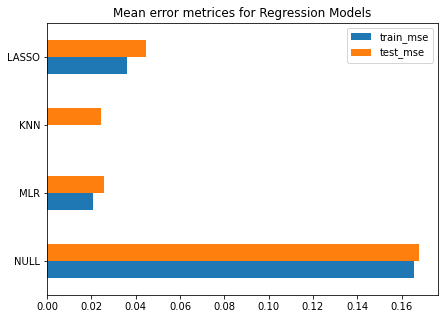

In [282]:
fig, ax = plt.subplots(figsize=(7,5))
Model_mean.T.plot(kind='barh', ax=ax)
ax.set_title('Mean error metrices for Regression Models');

In [283]:
Model_r

,NULL,MLR,KNN,LASSO
train_R2,0.0,0.875052,0.999985,0.780911
test_R2,-0.002388,0.847712,0.854543,0.734167
train_explained_variance,0.0,0.875052,0.999985,0.780911
test_explained_variance,0.0,0.848561,0.856709,0.736897


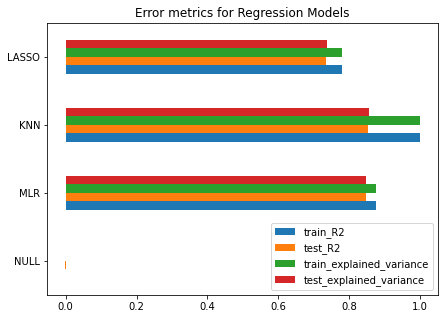

In [284]:
fig, ax = plt.subplots(figsize=(7,5))
Model_r.T.plot(kind='barh', ax=ax)
ax.set_title('Error metrics for Regression Models');

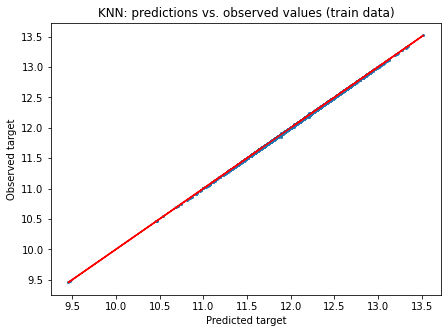

In [285]:
fig, ax = plt.subplots(figsize=(7,5))
ax.scatter(knn.predict(x_train), y_train, s=4)
ax.plot(y_train, y_train, color='red')
ax.set_title('KNN: predictions vs. observed values (train data)')
ax.set_xlabel('Predicted target')
ax.set_ylabel('Observed target');

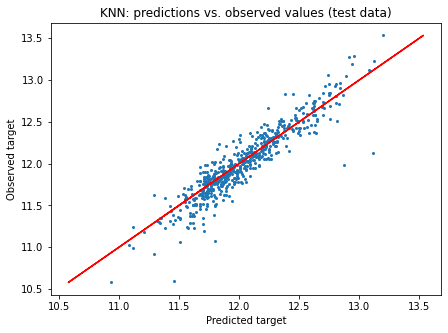

In [286]:
fig, ax = plt.subplots(figsize=(7,5))
ax.scatter(knn.predict(x_test), y_test, s=4)
ax.plot(y_test, y_test, color='red')
ax.set_title('KNN: predictions vs. observed values (test data)')
ax.set_xlabel('Predicted target')
ax.set_ylabel('Observed target');

# Making predictions with all eatures 

#### Getting the train and test sets using all features 

In [288]:
target_name = 'target'
X = target_column.drop(target_name, axis=1)

#Apply robust scaling to explanatory features to reduce outliers
robust_scaler = RobustScaler()
X = robust_scaler.fit_transform(X)  # x_new=x-median(data)/(Q3-Q1)

y = target_column[target_name]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

## The Null model: predicts the average of the target

In [289]:
y_pred_null = y_train.mean()

Model_mean.loc['train_mse','NULL'] = mean_squared_error(y_pred=np.repeat(y_pred_null, y_train.size), y_true=y_train)
Model_mean.loc['test_mse','NULL'] = mean_squared_error(y_pred=np.repeat(y_pred_null, y_test.size), y_true=y_test)
Model_r.loc['train_R2','NULL'] = r2_score(y_pred=np.repeat(y_pred_null, y_train.size), y_true=y_train)
Model_r.loc['test_R2','NULL'] = r2_score(y_pred=np.repeat(y_pred_null, y_test.size), y_true=y_test)
Model_r.loc['train_explained_variance','NULL'] = explained_variance_score(y_pred=np.repeat(y_pred_null, y_train.size), y_true=y_train)
Model_r.loc['test_explained_variance','NULL'] = explained_variance_score(y_pred=np.repeat(y_pred_null, y_test.size), y_true=y_test)

## Multiple Linear Regression

In [290]:
# 1. Import the estimator object (model)
from sklearn.linear_model import LinearRegression
# 2. Create an instance of the estimator
linear_regression = LinearRegression()
# 3. Use the trainning data to train the estimator
linear_regression.fit(x_train, y_train)
# 4. Evaluate the model
Model_mean.loc['train_mse','MLR'] = mean_squared_error(y_pred=linear_regression.predict(x_train), y_true=y_train)
Model_mean.loc['test_mse','MLR'] = mean_squared_error(y_pred=linear_regression.predict(x_test), y_true=y_test)
Model_r.loc['train_R2','MLR'] = r2_score(y_pred=linear_regression.predict(x_train), y_true=y_train)
Model_r.loc['test_R2','MLR'] = r2_score(y_pred=linear_regression.predict(x_test), y_true=y_test)
Model_r.loc['train_explained_variance','MLR'] = explained_variance_score(y_pred=linear_regression.predict(x_train), y_true=y_train)
Model_r.loc['test_explained_variance','MLR'] = explained_variance_score(y_pred=linear_regression.predict(x_test), y_true=y_test)

## K-Nearest Neighbor Model

In [291]:
# 1. Import the estimator object (model)
from sklearn.neighbors import KNeighborsRegressor
# 2. Create an instance of the estimator
knn = KNeighborsRegressor(n_neighbors=10, weights='distance', metric='euclidean', n_jobs=-1)
# 3. Use the training data to train the estimator
knn.fit(x_train, y_train)
# 4. Evaluate the model
Model_mean.loc['train_mse','KNN'] = mean_squared_error(y_pred=knn.predict(x_train), y_true=y_train)
Model_mean.loc['test_mse','KNN'] = mean_squared_error(y_pred=knn.predict(x_test), y_true=y_test)
Model_r.loc['train_R2','KNN'] = r2_score(y_pred=knn.predict(x_train), y_true=y_train)
Model_r.loc['test_R2','KNN'] = r2_score(y_pred=knn.predict(x_test), y_true=y_test)
Model_r.loc['train_explained_variance','KNN'] = explained_variance_score(y_pred=knn.predict(x_train), y_true=y_train)
Model_r.loc['test_explained_variance','KNN'] = explained_variance_score(y_pred=knn.predict(x_test), y_true=y_test)

## Lasso

In [292]:
# 1. Import the estimator object (model)
from sklearn.linear_model import Lasso
# 2. Create an instance of the estimator
lasso = Lasso(alpha=0.05)
# 3. Use the training data to train the estimator
lasso.fit(x_train, y_train)
# 4. Evaluate the model
Model_mean.loc['train_mse','LASSO'] = mean_squared_error(y_pred=lasso.predict(x_train), y_true=y_train)
Model_mean.loc['test_mse','LASSO'] = mean_squared_error(y_pred=lasso.predict(x_test), y_true=y_test)
Model_r.loc['train_R2','LASSO'] = r2_score(y_pred=lasso.predict(x_train), y_true=y_train)
Model_r.loc['test_R2','LASSO'] = r2_score(y_pred=lasso.predict(x_test), y_true=y_test)
Model_r.loc['train_explained_variance','LASSO'] = explained_variance_score(y_pred=lasso.predict(x_train), y_true=y_train)
Model_r.loc['test_explained_variance','LASSO'] = explained_variance_score(y_pred=lasso.predict(x_test), y_true=y_test)

In [293]:
Model_mean

,NULL,MLR,KNN,LASSO
train_mse,0.165629,0.019701,0.000002,0.036225
test_mse,0.167917,0.023745,0.0225,0.045008


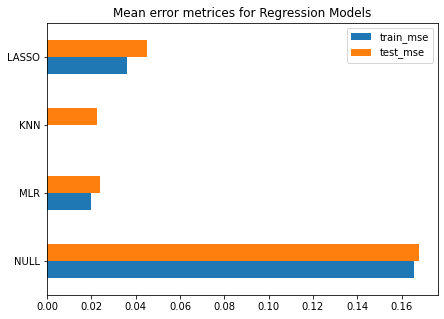

In [294]:
fig, ax = plt.subplots(figsize=(7,5))
Model_mean.T.plot(kind='barh', ax=ax)
ax.set_title('Mean error metrices for Regression Models');

In [295]:
Model_r

,NULL,MLR,KNN,LASSO
train_R2,0.0,0.881056,0.999985,0.781288
test_R2,-0.002388,0.858254,0.865688,0.731324
train_explained_variance,0.0,0.881056,0.999985,0.781288
test_explained_variance,0.0,0.859028,0.866689,0.734077


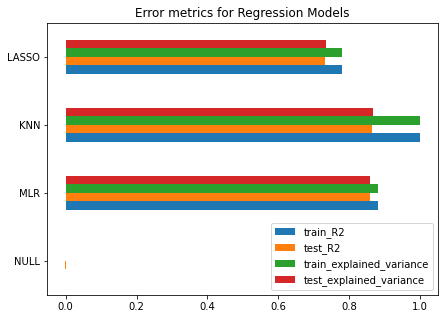

In [296]:
fig, ax = plt.subplots(figsize=(7,5))
Model_r.T.plot(kind='barh', ax=ax)
ax.set_title('Error metrics for Regression Models');

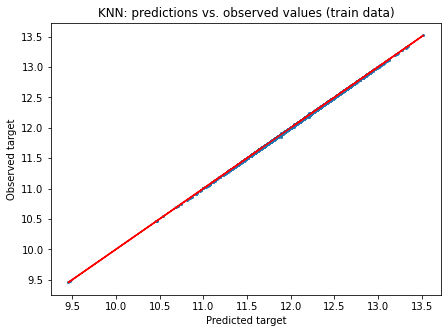

In [297]:
fig, ax = plt.subplots(figsize=(7,5))
ax.scatter(knn.predict(x_train), y_train, s=4)
ax.plot(y_train, y_train, color='red')
ax.set_title('KNN: predictions vs. observed values (train data)')
ax.set_xlabel('Predicted target')
ax.set_ylabel('Observed target');

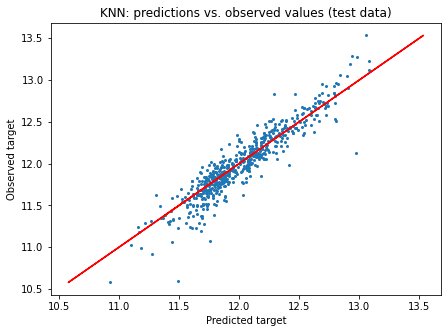

In [298]:
fig, ax = plt.subplots(figsize=(7,5))
ax.scatter(knn.predict(x_test), y_test, s=4)
ax.plot(y_test, y_test, color='red')
ax.set_title('KNN: predictions vs. observed values (test data)')
ax.set_xlabel('Predicted target')
ax.set_ylabel('Observed target');

### Reflection 

Referencing the above tables (results) one can observe that KNN model provides relatively lower MSE and the higher R-square/and explained_variance for both the train & test features when predicting the model using all features.

While prediction is made by the selected 16 features, still KNN performed better with few exceptions(i.e. MLE yields slightly higher R_Square value for the test feature).

Hence, one can conclude that KNN is the best model among the other three for predicting the target. 